# *Лабораторная работа №1*
---

## Задания:
1. Определите игрока, принявшего участие в наибольшем числе игр.
2. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
3. Определите год, в котором наиболее интенсивно играли в баскетбол.
4. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).
5. Постройте гистограмму по признаку Year.
6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
7. Добавьте в набор данных признак, являющийся произведением двух других признаков.
8. Определите самое популярное имя среди игроков.


In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd

basketball_df = pd.read_csv('Seasons_Stats.csv')
print(basketball_df.head())

   Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]


In [2]:
%matplotlib inline
basketball_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [3]:
basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

# Задание 1

In [5]:
basketball_df.sort_values(by=['G'], ascending=False).head(1)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2676,2676,1969.0,Walt Bellamy*,C,29.0,TOT,88.0,NaN,3159.0,18.0,...,0.649,NaN,NaN,1101.0,176.0,NaN,NaN,NaN,320.0,1527.0


# Задание 2

In [6]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

laber_encoder = LabelEncoder()
Value1 = pd.Series(laber_encoder.fit_transform(basketball_df['Age'].astype(float)))
Value2 = pd.Series(laber_encoder.fit_transform(basketball_df['G'].astype(float)))

pears = pearsonr(Value1, Value2)
spearm = spearmanr(Value1, Value2)

print("Коэффициент корреляции Пирсона: ", pears)
print("Коэффициент корреляции Спирмена: ", spearm)

basketball_df.Age.hist(bins = 30) 
basketball_df.G.hist(bins = 30)

if (spearm[1]<0.05):
    print("p-value is normal")
else:
    print("p-value is not normal")

ModuleNotFoundError: No module named 'scipy'

# Задание 3

In [6]:
basketball_df['Year'].value_counts().index[0]

2015.0

# Задание 4

In [7]:
basketball_df[basketball_df['PTS'] == basketball_df['PTS'].max()][['Pos', 'PTS']]

,Pos,PTS
1706,C,4029.0


In [8]:
basketball_df[basketball_df['PTS'] == basketball_df['PTS'].min()][['Pos', 'PTS']].head(10)

,Pos,PTS
132,C,0.0
320,F,0.0
816,F,0.0
843,F,0.0
860,C,0.0
1129,G,0.0
1316,F,0.0
1333,F,0.0
1414,PG,0.0
1561,G-F,0.0


# Задание 5

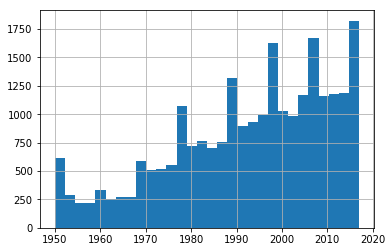

In [9]:
basketball_df.Year.hist(bins = 30)

# Задание 6

In [10]:
print("Записи до удаления: {0}".format(basketball_df.shape[0]))
new_basketball = basketball_df.copy()
new_basketball.replace(0.0, np.nan, inplace = True)
new_basketball.dropna(inplace = True)
print("Записи после удаления: {0}".format(new_basketball.shape[0]))

Записи до удаления: 24691
Записи после удаления: 0


# Задание 7

In [11]:
basketball_df['PF*G'] = [n for n in (basketball_df['PF'] * basketball_df['G'] )]
basketball_df[['PF', 'G', 'PF*G']].head(15)

,PF,G,PF*G
0,217.0,63.0,13671.0
1,99.0,49.0,4851.0
2,192.0,67.0,12864.0
3,29.0,15.0,435.0
4,27.0,13.0,351.0
5,2.0,2.0,4.0
6,132.0,60.0,7920.0
7,6.0,3.0,18.0
8,273.0,65.0,17745.0
9,140.0,36.0,5040.0


# Задание 8

In [65]:
stolb = basketball_df['Player'].copy()
stolb.dropna()
stolb.value_counts().head(1)

Eddie Johnson    33
Name: Player, dtype: int64

---

## Конец